In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Marktkampagne.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   int64  
 1   Geburtsjahr              2240 non-null   int64  
 2   Bildungsniveau           2240 non-null   object 
 3   Familienstand            2240 non-null   object 
 4   Einkommen                2216 non-null   float64
 5   Kinder_zu_Hause          2240 non-null   int64  
 6   Teenager_zu_Hause        2240 non-null   int64  
 7   Datum_Kunde              2240 non-null   object 
 8   Letzter_Kauf_Tage        2240 non-null   int64  
 9   Beschwerde               2240 non-null   int64  
 10  Ausgaben_Wein            2240 non-null   int64  
 11  Ausgaben_Obst            2240 non-null   int64  
 12  Ausgaben_Fleisch         2240 non-null   int64  
 13  Ausgaben_Fisch           2240 non-null   int64  
 14  Ausgaben_Süßigkeiten    

In [4]:
df.head()

,ID,Geburtsjahr,Bildungsniveau,Familienstand,Einkommen,Kinder_zu_Hause,Teenager_zu_Hause,Datum_Kunde,Letzter_Kauf_Tage,Beschwerde,...,Anzahl_Webkäufe,Anzahl_Katalogkäufe,Anzahl_Ladeneinkäufe,Anzahl_WebBesuche_Monat,Kampagne_1_Akzeptiert,Kampagne_2_Akzeptiert,Kampagne_3_Akzeptiert,Kampagne_4_Akzeptiert,Kampagne_5_Akzeptiert,Antwort_Letzte_Kampagne
0,5524,1967,Hochschulabschluss,Ledig,58138.0,0,0,04-09-2022,58,0,...,8,10,4,7,0,0,0,0,0,1
1,2174,1964,Hochschulabschluss,Ledig,46344.0,1,1,08-03-2024,38,0,...,1,1,2,5,0,0,0,0,0,0
2,4141,1975,Hochschulabschluss,Zusammenlebend,71613.0,0,0,21-08-2023,26,0,...,8,2,10,4,0,0,0,0,0,0
3,6182,1994,Hochschulabschluss,Zusammenlebend,26646.0,1,0,10-02-2024,26,0,...,2,0,4,6,0,0,0,0,0,0
4,5324,1991,Doktor,Verheiratet,58293.0,1,0,19-01-2024,94,0,...,5,3,6,5,0,0,0,0,0,0


In [5]:
# Berechne den Median des Einkommens (ignoriert automatisch NaN)
einkommen_median = df['Einkommen'].median()

In [6]:
# Ersetze fehlende Werte mit dem Median
df['Einkommen'].fillna(einkommen_median, inplace=True)

In [7]:
print(df['Einkommen'].isnull().sum())

0


In [8]:
# 1. Bildungsniveau ansehen
print("===== Bildungsniveau - Werte und Häufigkeiten =====")
print(df['Bildungsniveau'].value_counts())
print()

===== Bildungsniveau - Werte und Häufigkeiten =====
Bildungsniveau
Hochschulabschluss       1127
Doktor                    486
Master                    370
Zweiter Studienzyklus     203
Grundbildung               54
Name: count, dtype: int64



In [9]:
# 2. Familienstand ansehen
print("===== Familienstand - Werte und Häufigkeiten =====")
print(df['Familienstand'].value_counts())

===== Familienstand - Werte und Häufigkeiten =====
Familienstand
Verheiratet            864
Zusammenlebend         580
Ledig                  480
Geschieden             232
Verwitwet               77
Allein                   3
Absurd                   2
Man lebt nur einmal      2
Name: count, dtype: int64


In [10]:
# Ersetze die ungewöhnlichen Werte mit 'Ledig'
ersetzung_dict = {
    'Allein': 'Ledig',
    'Absurd': 'Ledig',
    'Man lebt nur einmal': 'Ledig'
}
df['Familienstand'] = df['Familienstand'].replace(ersetzung_dict)

# Überprüfe die neuen Häufigkeiten
print("\n===== Familienstand NACH der Bereinigung =====")
print(df['Familienstand'].value_counts())


===== Familienstand NACH der Bereinigung =====
Familienstand
Verheiratet       864
Zusammenlebend    580
Ledig             487
Geschieden        232
Verwitwet          77
Name: count, dtype: int64


In [11]:
# Datum von Text zu richtigen Datum ändern
df['Datum_Kunde'] = pd.to_datetime(df['Datum_Kunde'], dayfirst=True)

# Überprüfen
print(df['Datum_Kunde'].head())
print(df['Datum_Kunde'].dtype)

0   2022-09-04
1   2024-03-08
2   2023-08-21
3   2024-02-10
4   2024-01-19
Name: Datum_Kunde, dtype: datetime64[ns]
datetime64[ns]


In [12]:
# Heutiges Datum (als Referenz)
heute = pd.to_datetime('today')

# Dauer in Tagen berechnen
df['Kunden_dauer_Tage'] = (heute - df['Datum_Kunde']).dt.days

# Ansehen
print(df[['Datum_Kunde', 'Kunden_dauer_Tage']].head())

  Datum_Kunde  Kunden_dauer_Tage
0  2022-09-04               1248
1  2024-03-08                697
2  2023-08-21                897
3  2024-02-10                724
4  2024-01-19                746


count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Einkommen, dtype: float64


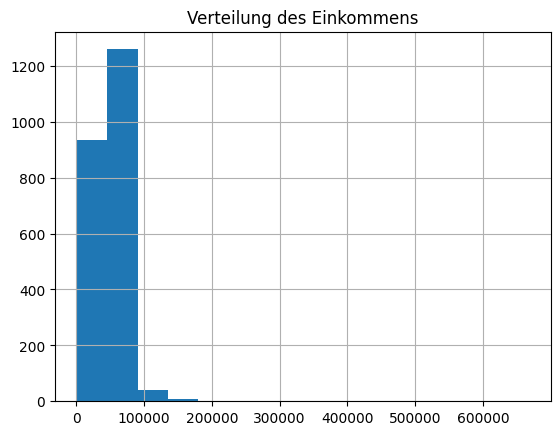

In [13]:
# Einfache Statistik für Einkommen
print(df['Einkommen'].describe())

# Einfache Visualisierung (optional)
import matplotlib.pyplot as plt
df['Einkommen'].hist(bins=15)
plt.title('Verteilung des Einkommens')
plt.show()

In [14]:
print("===== Daten-Überblick =====")
print(df.info())

print("\n===== Fehlende Werte =====")
print(df.isnull().sum())

===== Daten-Überblick =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2240 non-null   int64         
 1   Geburtsjahr              2240 non-null   int64         
 2   Bildungsniveau           2240 non-null   object        
 3   Familienstand            2240 non-null   object        
 4   Einkommen                2240 non-null   float64       
 5   Kinder_zu_Hause          2240 non-null   int64         
 6   Teenager_zu_Hause        2240 non-null   int64         
 7   Datum_Kunde              2240 non-null   datetime64[ns]
 8   Letzter_Kauf_Tage        2240 non-null   int64         
 9   Beschwerde               2240 non-null   int64         
 10  Ausgaben_Wein            2240 non-null   int64         
 11  Ausgaben_Obst            2240 non-null   int64         
 12  Ausgab

In [15]:
# 1. Bildungsniveau umwandeln
bildung_dummy = pd.get_dummies(df['Bildungsniveau'], prefix='Bildung')

# 2. An DataFrame anhängen
df = pd.concat([df, bildung_dummy], axis=1)

# 3. Überprüfen
print("Neue Spalten:", bildung_dummy.columns.tolist())
print("\nBeispiel:")
print(bildung_dummy.head())

Neue Spalten: ['Bildung_Doktor', 'Bildung_Grundbildung', 'Bildung_Hochschulabschluss', 'Bildung_Master', 'Bildung_Zweiter Studienzyklus']

Beispiel:
   Bildung_Doktor  Bildung_Grundbildung  Bildung_Hochschulabschluss  \
0           False                 False                        True   
1           False                 False                        True   
2           False                 False                        True   
3           False                 False                        True   
4            True                 False                       False   

   Bildung_Master  Bildung_Zweiter Studienzyklus  
0           False                          False  
1           False                          False  
2           False                          False  
3           False                          False  
4           False                          False  


In [16]:
# 1. Familienstand umwandeln
familie_dummy = pd.get_dummies(df['Familienstand'], prefix='Familie')

# 2. An DataFrame anhängen
df = pd.concat([df, familie_dummy], axis=1)

# 3. Überprüfen
print("Neue Spalten für Familienstand:", familie_dummy.columns.tolist())
print("\nBeispiel (erste 3 Zeilen):")
print(familie_dummy.head(3))

Neue Spalten für Familienstand: ['Familie_Geschieden', 'Familie_Ledig', 'Familie_Verheiratet', 'Familie_Verwitwet', 'Familie_Zusammenlebend']

Beispiel (erste 3 Zeilen):
   Familie_Geschieden  Familie_Ledig  Familie_Verheiratet  Familie_Verwitwet  \
0               False           True                False              False   
1               False           True                False              False   
2               False          False                False              False   

   Familie_Zusammenlebend  
0                   False  
1                   False  
2                    True  


In [17]:
# Liste der Spalten, die wir entfernen möchten
zu_entfernen = ['ID', 'Bildungsniveau', 'Familienstand', 'Datum_Kunde']

# Sicherheitscheck: Existieren diese Spalten?
for spalte in zu_entfernen:
    if spalte in df.columns:
        print(f"Entferne: {spalte}")
    else:
        print(f"Warnung: {spalte} nicht gefunden")

# Entfernen
df.drop(zu_entfernen, axis=1, inplace=True, errors='ignore')

# Neue Spaltenanzahl anzeigen
print(f"\nNeue Anzahl Spalten: {df.shape[1]}")
print(f"Neue Spalten: {list(df.columns)}")

Entferne: ID
Entferne: Bildungsniveau
Entferne: Familienstand
Entferne: Datum_Kunde

Neue Anzahl Spalten: 34
Neue Spalten: ['Geburtsjahr', 'Einkommen', 'Kinder_zu_Hause', 'Teenager_zu_Hause', 'Letzter_Kauf_Tage', 'Beschwerde', 'Ausgaben_Wein', 'Ausgaben_Obst', 'Ausgaben_Fleisch', 'Ausgaben_Fisch', 'Ausgaben_Süßigkeiten', 'Ausgaben_Gold', 'Anzahl_Rabattkäufe', 'Anzahl_Webkäufe', 'Anzahl_Katalogkäufe', 'Anzahl_Ladeneinkäufe', 'Anzahl_WebBesuche_Monat', 'Kampagne_1_Akzeptiert', 'Kampagne_2_Akzeptiert', 'Kampagne_3_Akzeptiert', 'Kampagne_4_Akzeptiert', 'Kampagne_5_Akzeptiert', 'Antwort_Letzte_Kampagne', 'Kunden_dauer_Tage', 'Bildung_Doktor', 'Bildung_Grundbildung', 'Bildung_Hochschulabschluss', 'Bildung_Master', 'Bildung_Zweiter Studienzyklus', 'Familie_Geschieden', 'Familie_Ledig', 'Familie_Verheiratet', 'Familie_Verwitwet', 'Familie_Zusammenlebend']


In [18]:
# Zielvariable und Features trennen
# Zielvariable ansehen
y = df['Antwort_Letzte_Kampagne']

print("Reagiert (1) vs Nicht (0):")
print(y.value_counts())


Reagiert (1) vs Nicht (0):
Antwort_Letzte_Kampagne
0    1906
1     334
Name: count, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split

# Daten aufteilen
X = df.drop('Antwort_Letzte_Kampagne', axis=1)
y = df['Antwort_Letzte_Kampagne']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Überprüfen
print("Training:", X_train.shape, "Test:", X_test.shape)
print("Verteilung im Training:", y_train.value_counts().to_dict())

Training: (1792, 33) Test: (448, 33)
Verteilung im Training: {0: 1527, 1: 265}


In [20]:
from sklearn.preprocessing import StandardScaler

# Skalierer erstellen und auf Trainingsdaten anpassen
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Testdaten mit gleicher Skalierung transformieren
X_test_scaled = scaler.transform(X_test)

print("Daten skaliert!")
print("Beispiel (erste Zeile, erste 5 Werte):", X_train_scaled[0, :5])

Daten skaliert!
Beispiel (erste Zeile, erste 5 Werte): [-1.59662471 -1.35137271 -0.83792139 -0.92556693  0.01987908]


In [21]:
# Neues Modell mit skalierten Daten
from sklearn.linear_model import LogisticRegression
model_scaled = LogisticRegression(class_weight='balanced', random_state=42, max_iter=2000)
model_scaled.fit(X_train_scaled, y_train)

# Vorhersagen
y_pred_scaled = model_scaled.predict(X_test_scaled)

print("Modell mit skalierten Daten trainiert!")
print("Erste 10 Vorhersagen:", y_pred_scaled[:10])
print("Erste 10 echte Werte :", y_test.values[:10])

Modell mit skalierten Daten trainiert!
Erste 10 Vorhersagen: [0 1 0 1 0 0 0 0 0 0]
Erste 10 echte Werte : [0 0 0 0 0 0 0 0 0 0]


In [22]:
# Modell bewerten
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred_scaled)
print(f"Genauigkeit: {accuracy:.2%}")
print("\nKonfusionsmatrix:")
print(confusion_matrix(y_test, y_pred_scaled))

Genauigkeit: 82.59%

Konfusionsmatrix:
[[319  60]
 [ 18  51]]


In [23]:
print("Detaillierter Klassifikationsreport:")
print(classification_report(y_test, y_pred_scaled))

Detaillierter Klassifikationsreport:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       379
           1       0.46      0.74      0.57        69

    accuracy                           0.83       448
   macro avg       0.70      0.79      0.73       448
weighted avg       0.87      0.83      0.84       448



In [24]:
# Feature Importance anzeigen
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_scaled.coef_[0]
})
print(importances.sort_values('Importance', ascending=False).head(10))

                    Feature  Importance
22        Kunden_dauer_Tage    0.977690
21    Kampagne_5_Akzeptiert    0.599944
19    Kampagne_3_Akzeptiert    0.592699
14      Anzahl_Katalogkäufe    0.499136
8          Ausgaben_Fleisch    0.465348
17    Kampagne_1_Akzeptiert    0.441322
23           Bildung_Doktor    0.425189
20    Kampagne_4_Akzeptiert    0.380953
16  Anzahl_WebBesuche_Monat    0.349476
13          Anzahl_Webkäufe    0.339341


In [25]:
# --- REGRESSION: Kundenwert vorhersagen ---

# Zielvariable
y_reg = df["Kundenwert"]

# Features
X_reg = df.drop("Kundenwert", axis=1)

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Lineare Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

y_pred_reg = lin_reg.predict(X_test_reg)

print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("R² Score:", r2_score(y_test_reg, y_pred_reg))

KeyError: 'Kundenwert'

In [ ]:
df.corr(numeric_only=True)["Kundenwert"].sort_values(ascending=False)

Kundenwert                       1.000000
Kampagnen_Reaktionsrate          0.906565
Gesamtausgaben                   0.780027
Gesamtausgaben_temp              0.780027
Ausgaben_pro_Kind                0.770853
Ausgaben_Wein                    0.770633
Ausgaben_pro_Person              0.746002
Kampagne_5_Akzeptiert            0.711055
Kampagne_1_Akzeptiert            0.642922
Ausgaben_Fleisch                 0.598072
Anzahl_Katalogkäufe              0.595966
Kampagne_4_Akzeptiert            0.547079
Einkommen                        0.506624
Anzahl_Ladeneinkäufe             0.453554
Antwort_Letzte_Kampagne          0.437718
Cluster                          0.434703
Ausgaben_Fisch                   0.416145
Ausgaben_Süßigkeiten             0.414558
Ausgaben_Obst                    0.390263
Kampagne_2_Akzeptiert            0.383970
Ausgaben_Gold                    0.383664
Anzahl_Webkäufe                  0.383565
Kampagne_3_Akzeptiert            0.325834
Kunden_dauer_Tage                0

In [ ]:
print(X_train_reg.shape, X_test_reg.shape)
print(X_train_reg.columns[:10])

(1792, 43) (448, 43)
Index(['Geburtsjahr', 'Einkommen', 'Kinder_zu_Hause', 'Teenager_zu_Hause',
       'Letzter_Kauf_Tage', 'Beschwerde', 'Ausgaben_Wein', 'Ausgaben_Obst',
       'Ausgaben_Fleisch', 'Ausgaben_Fisch'],
      dtype='object')


In [ ]:
from sklearn.linear_model import LinearRegression

test_model = LinearRegression()
test_model.fit(X_reg, y_reg)

print(test_model.score(X_reg, y_reg))

1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Modell
rf_model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_estimators=100  # 100 Bäume
)

# Training
rf_model.fit(X_train_scaled, y_train)

# Vorhersagen
y_pred_rf = rf_model.predict(X_test_scaled)

# Bewertung
from sklearn.metrics import classification_report
print("Random Forest - Klassifikationsreport:")
print(classification_report(y_test, y_pred_rf))

Random Forest - Klassifikationsreport:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       379
           1       0.72      0.26      0.38        69

    accuracy                           0.87       448
   macro avg       0.80      0.62      0.66       448
weighted avg       0.85      0.87      0.84       448



In [ ]:
# Wahrscheinlichkeiten von Random Forest (besser für Threshold-Tuning)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]  # Nur Wahrscheinlichkeit für Klasse 1

# Zeige erste 5 Wahrscheinlichkeiten
print("Erste 5 Wahrscheinlichkeiten für Klasse 1:")
print(y_proba_rf[:5])

Erste 5 Wahrscheinlichkeiten für Klasse 1:
[0.09920157 0.27191777 0.08       0.28       0.13      ]


In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Precision-Recall-Kurve berechnen
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_rf)

# Einfache Tabelle für wichtige Thresholds
print("Threshold | Precision | Recall")
print("-" * 30)
for i in range(0, len(thresholds), 20):  # Jeden 20. Wert anzeigen
    print(f"{thresholds[i]:.2f}      | {precision[i]:.2f}      | {recall[i]:.2f}")

Threshold | Precision | Recall
------------------------------
0.00      | 0.15      | 1.00
0.05      | 0.25      | 0.97
0.10      | 0.30      | 0.90
0.16      | 0.40      | 0.83
0.20      | 0.45      | 0.72
0.27      | 0.51      | 0.58
0.36      | 0.55      | 0.38
0.53      | 0.75      | 0.26
0.83      | 1.00      | 0.01


In [ ]:
# Threshold festlegen
custom_threshold = 0.27

# Neue Vorhersagen mit diesem Threshold
y_pred_custom = (y_proba_rf >= custom_threshold).astype(int)

# Ergebnisse anzeigen
from sklearn.metrics import classification_report
print(f"Custom Threshold {custom_threshold} - Klassifikationsreport:")
print(classification_report(y_test, y_pred_custom))

Custom Threshold 0.27 - Klassifikationsreport:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       379
           1       0.51      0.55      0.53        69

    accuracy                           0.85       448
   macro avg       0.72      0.73      0.72       448
weighted avg       0.85      0.85      0.85       448



In [ ]:
# 1. GESAMTAUSGABEN (für Umsatzanalyse)
ausgaben_spalten = ['Ausgaben_Wein', 'Ausgaben_Obst', 'Ausgaben_Fleisch', 
                    'Ausgaben_Fisch', 'Ausgaben_Süßigkeiten', 'Ausgaben_Gold']
df['Gesamtausgaben'] = df[ausgaben_spalten].sum(axis=1)

In [ ]:
# 2. AUSGABEN PRO PERSON (für Haushaltsanalyse)
df['Haushaltsgroesse'] = df['Kinder_zu_Hause'] + df['Teenager_zu_Hause'] + 1
df['Ausgaben_pro_Person'] = df['Gesamtausgaben'] / df['Haushaltsgroesse']

In [ ]:
# 3. KAMPAGNEN-REAKTIONSRATE (für Marketing-Analyse)
kampagnen_spalten = ['Kampagne_1_Akzeptiert', 'Kampagne_2_Akzeptiert',
                     'Kampagne_3_Akzeptiert', 'Kampagne_4_Akzeptiert',
                     'Kampagne_5_Akzeptiert']
df['Kampagnen_Reaktionsrate'] = df[kampagnen_spalten].sum(axis=1) / 5

In [ ]:
print("Neue Features - erste 5 Zeilen:")
print(df[['Gesamtausgaben', 'Ausgaben_pro_Person', 'Kampagnen_Reaktionsrate']].head())

Neue Features - erste 5 Zeilen:
   Gesamtausgaben  Ausgaben_pro_Person  Kampagnen_Reaktionsrate
0            1617               1617.0                      0.0
1              27                  9.0                      0.0
2             776                776.0                      0.0
3              53                 26.5                      0.0
4             422                211.0                      0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Features für Clustering auswählen
clustering_features = ['Gesamtausgaben', 'Ausgaben_pro_Person', 'Einkommen', 
                       'Kampagnen_Reaktionsrate', 'Kunden_dauer_Tage']

# Skalieren
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(df[clustering_features])

print("Daten für Clustering skaliert!")
print("Größe:", X_cluster_scaled.shape)

Daten für Clustering skaliert!
Größe: (2240, 5)


In [ ]:
from sklearn.cluster import KMeans

# K-Means mit 3 Clustern
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_cluster_scaled)

# Cluster-Labels speichern
df['Cluster'] = cluster_labels

# Verteilung ansehen
print("Verteilung der Cluster:")
print(df['Cluster'].value_counts().sort_index())

Verteilung der Cluster:
Cluster
0    1364
1     220
2     656
Name: count, dtype: int64


In [ ]:
# Mittelwerte pro Cluster berechnen
cluster_profile = df.groupby('Cluster')[clustering_features].mean()

print("Cluster-Profile (Durchschnittswerte):")
print(cluster_profile.round(2))

Cluster-Profile (Durchschnittswerte):
         Gesamtausgaben  Ausgaben_pro_Person  Einkommen  \
Cluster                                                   
0                187.32                94.59   38857.95   
1               1628.85              1501.53   82246.55   
2               1132.82               840.03   69994.78   

         Kampagnen_Reaktionsrate  Kunden_dauer_Tage  
Cluster                                              
0                           0.02             914.73  
1                           0.38             931.68  
2                           0.03             976.25  


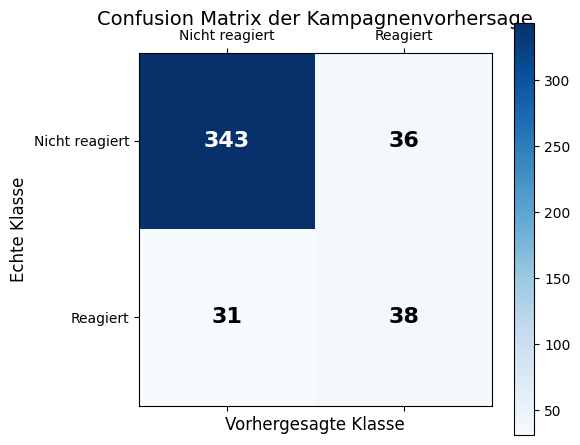

✅ Grafik gespeichert!

Interpretation:
TN (oben links): 343 - Richtig als nicht-reagierend erkannt
FP (oben rechts): 36 - Falsch als reagierend vorhergesagt
FN (unten links): 31 - Falsch als nicht-reagierend vorhergesagt
TP (unten rechts): 38 - Richtig als reagierend erkannt


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# 1. Confusion Matrix berechnen
cm = confusion_matrix(y_test, y_pred_custom)

# 2. Grafik erstellen
fig, ax = plt.subplots(figsize=(6, 5))

# Matrix anzeigen mit Blautönen
cax = ax.matshow(cm, cmap=plt.cm.Blues)

# Titel
ax.set_title('Confusion Matrix der Kampagnenvorhersage', pad=20, size=14)

# Zahlen in die Zellen
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), 
                ha='center', va='center',
                color='black' if cm[i, j] < cm.max()/2 else 'white',
                size=16, weight='bold')

# Beschriftungen
ax.set_xlabel('Vorhergesagte Klasse', size=12)
ax.set_ylabel('Echte Klasse', size=12)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Nicht reagiert', 'Reagiert'])
ax.set_yticklabels(['Nicht reagiert', 'Reagiert'])

# Farbleiste
plt.colorbar(cax)

plt.tight_layout()
plt.savefig('confusion_gut.png', dpi=300)
plt.show()

print("✅ Grafik gespeichert!")
print("\nInterpretation:")
print(f"TN (oben links): {cm[0,0]} - Richtig als nicht-reagierend erkannt")
print(f"FP (oben rechts): {cm[0,1]} - Falsch als reagierend vorhergesagt")
print(f"FN (unten links): {cm[1,0]} - Falsch als nicht-reagierend vorhergesagt") 
print(f"TP (unten rechts): {cm[1,1]} - Richtig als reagierend erkannt")

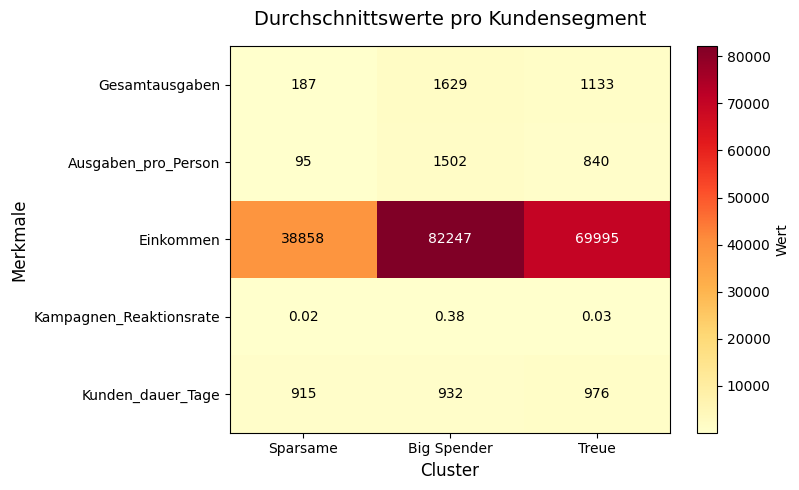

✅ Cluster-Profile gespeichert!


In [ ]:
# Cluster-Profile Heatmap
fig, ax = plt.subplots(figsize=(8, 5))

# Daten für Heatmap vorbereiten
data_for_heatmap = cluster_profile.T.values

# Heatmap
cax = ax.imshow(data_for_heatmap, cmap='YlOrRd', aspect='auto')

# Titel und Beschriftungen
ax.set_title('Durchschnittswerte pro Kundensegment', size=14, pad=15)
ax.set_xlabel('Cluster', size=12)
ax.set_ylabel('Merkmale', size=12)

# Achsenbeschriftungen
ax.set_xticks([0, 1, 2])
ax.set_yticks(range(len(clustering_features)))
ax.set_xticklabels(['Sparsame', 'Big Spender', 'Treue'])
ax.set_yticklabels(clustering_features)

# Zahlen in Zellen
for i in range(data_for_heatmap.shape[0]):
    for j in range(data_for_heatmap.shape[1]):
        ax.text(j, i, f'{data_for_heatmap[i, j]:.0f}' if clustering_features[i] != 'Kampagnen_Reaktionsrate' else f'{data_for_heatmap[i, j]:.2f}',
                ha='center', va='center',
                color='black' if data_for_heatmap[i, j] < data_for_heatmap.max()/2 else 'white',
                size=10)

# Farbleiste
plt.colorbar(cax, ax=ax, label='Wert')

plt.tight_layout()
plt.savefig('cluster_profile_gut.png', dpi=300)
plt.show()
print("✅ Cluster-Profile gespeichert!")

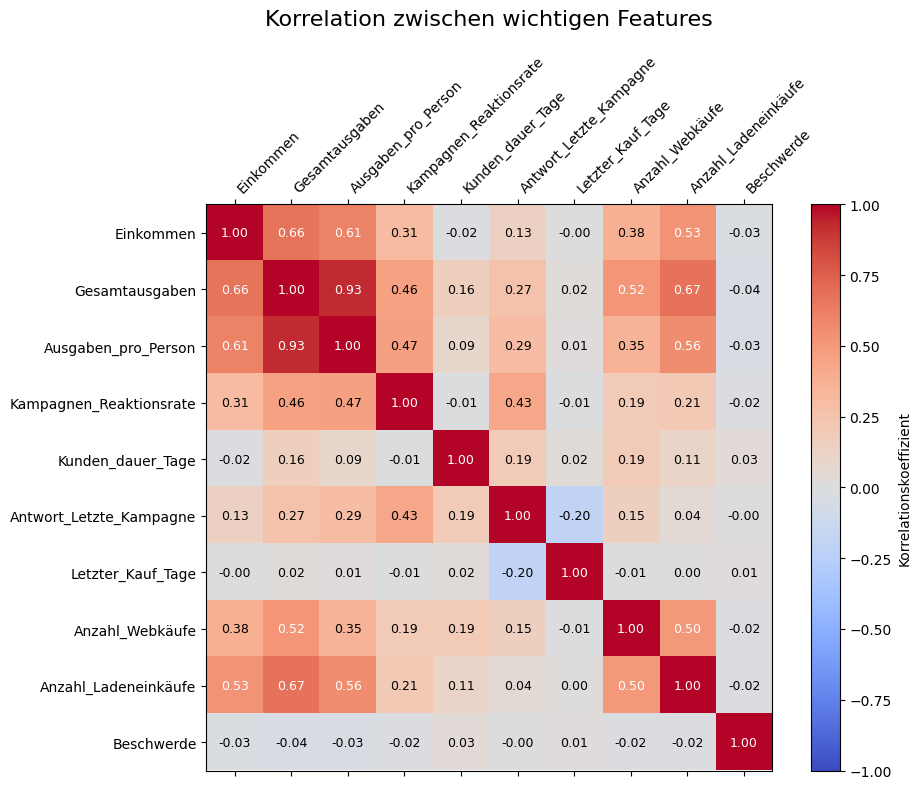

✅ Korrelationsmatrix gespeichert!


In [ ]:
# Nur die wichtigsten 10 Features für Korrelation
wichtige_features = ['Einkommen', 'Gesamtausgaben', 'Ausgaben_pro_Person', 
                     'Kampagnen_Reaktionsrate', 'Kunden_dauer_Tage',
                     'Antwort_Letzte_Kampagne', 'Letzter_Kauf_Tage',
                     'Anzahl_Webkäufe', 'Anzahl_Ladeneinkäufe', 'Beschwerde']

# Korrelationsmatrix berechnen
corr_matrix = df[wichtige_features].corr()

# Grafik
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Titel
ax.set_title('Korrelation zwischen wichtigen Features', size=16, pad=20)

# Beschriftungen
ax.set_xticks(range(len(wichtige_features)))
ax.set_yticks(range(len(wichtige_features)))
ax.set_xticklabels(wichtige_features, rotation=45, ha='left', size=10)
ax.set_yticklabels(wichtige_features, size=10)

# Zahlen in Zellen
for i in range(len(wichtige_features)):
    for j in range(len(wichtige_features)):
        ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', 
                color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black',
                size=9)

# Farbleiste
plt.colorbar(cax, ax=ax, label='Korrelationskoeffizient')

plt.tight_layout()
plt.savefig('korrelationsmatrix.png', dpi=300)
plt.show()
print("✅ Korrelationsmatrix gespeichert!")

In [ ]:
import pandas as pd
import numpy as np

# Feature Importance aus Random Forest Modell holen
feature_importance = rf_model.feature_importances_

# DataFrame erstellen
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sortieren nach Wichtigkeit
importance_df = importance_df.sort_values('Importance', ascending=False)

print("Top 5 wichtigste Features:")
print(importance_df.head())

Top 5 wichtigste Features:
              Feature  Importance
4   Letzter_Kauf_Tage    0.109818
22  Kunden_dauer_Tage    0.082996
8    Ausgaben_Fleisch    0.073405
11      Ausgaben_Gold    0.066917
6       Ausgaben_Wein    0.063762


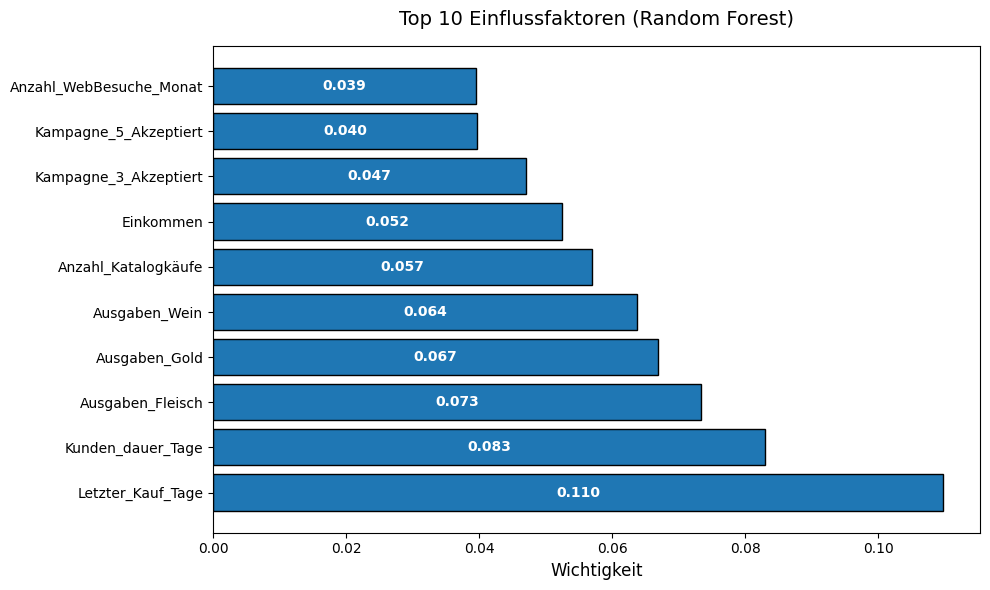

✅ Feature Importance Grafik gespeichert!


In [ ]:
import matplotlib.pyplot as plt

# Top 10 Features nehmen
top10 = importance_df.head(10)

# Grafik
fig, ax = plt.subplots(figsize=(10, 6))

# Balkenfarbe (nur Blau)
colors = ['#1f77b4'] * len(top10)

# Horizontal bars
bars = ax.barh(range(len(top10)), top10['Importance'], color=colors, edgecolor='black')

# Beschriftungen
ax.set_yticks(range(len(top10)))
ax.set_yticklabels(top10['Feature'])
ax.set_xlabel('Wichtigkeit', size=12)
ax.set_title('Top 10 Einflussfaktoren (Random Forest)', size=14, pad=15)

# Werte in Balken schreiben
for i, (bar, imp) in enumerate(zip(bars, top10['Importance'])):
    ax.text(imp/2, i, f'{imp:.3f}', 
            va='center', ha='center', 
            color='white', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('feature_importance_final.png', dpi=300)
plt.show()

print("✅ Feature Importance Grafik gespeichert!")

Zusammenhang: Ausgaben pro Person vs. Einkommen
Korrelationskoeffizient: 0.609
Interpretation: Positive Korrelation = Je höher Einkommen, desto höher Ausgaben pro Person

Durchschnittliche Ausgaben pro Person nach Kampagnenreaktion:
Keine Reaktion (0): €381
Reagiert (1): €850
Unterschied: 123.2%


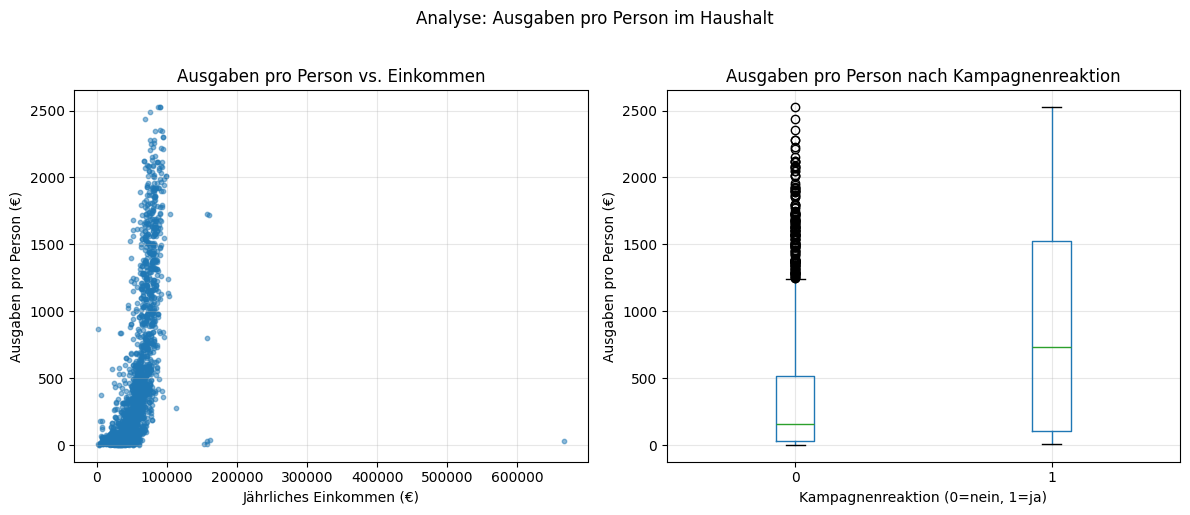


✅ Analyse gespeichert als 'ausgaben_analyse.png'


In [ ]:
# 1. Zusammenhang Ausgaben pro Person vs. Einkommen
print("Zusammenhang: Ausgaben pro Person vs. Einkommen")
corr_einkommen = df['Ausgaben_pro_Person'].corr(df['Einkommen'])
print(f"Korrelationskoeffizient: {corr_einkommen:.3f}")
print("Interpretation: Positive Korrelation = Je höher Einkommen, desto höher Ausgaben pro Person")

# 2. Zusammenhang Ausgaben pro Person vs. Kampagnenantwort
print("\n" + "="*50)
print("Durchschnittliche Ausgaben pro Person nach Kampagnenreaktion:")
kampagnen_gruppen = df.groupby('Antwort_Letzte_Kampagne')['Ausgaben_pro_Person'].mean()
print(f"Keine Reaktion (0): €{kampagnen_gruppen[0]:.0f}")
print(f"Reagiert (1): €{kampagnen_gruppen[1]:.0f}")
print(f"Unterschied: {((kampagnen_gruppen[1]/kampagnen_gruppen[0])-1)*100:.1f}%")

# 3. Einfache Visualisierung
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Ausgaben vs. Einkommen
ax1.scatter(df['Einkommen'], df['Ausgaben_pro_Person'], alpha=0.5, s=10)
ax1.set_xlabel('Jährliches Einkommen (€)')
ax1.set_ylabel('Ausgaben pro Person (€)')
ax1.set_title('Ausgaben pro Person vs. Einkommen')
ax1.grid(alpha=0.3)

# Plot 2: Boxplot nach Kampagnenreaktion
df.boxplot(column='Ausgaben_pro_Person', by='Antwort_Letzte_Kampagne', ax=ax2)
ax2.set_xlabel('Kampagnenreaktion (0=nein, 1=ja)')
ax2.set_ylabel('Ausgaben pro Person (€)')
ax2.set_title('Ausgaben pro Person nach Kampagnenreaktion')
ax2.grid(alpha=0.3)

plt.suptitle('Analyse: Ausgaben pro Person im Haushalt', y=1.02)
plt.tight_layout()
plt.savefig('ausgaben_analyse.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Analyse gespeichert als 'ausgaben_analyse.png'")

In [ ]:
# Kundenwert = Ausgaben + Kampagnenreaktion + Loyalität
df['Kundenwert'] = (df['Gesamtausgaben'] * 0.7 + 
                    df['Kampagnen_Reaktionsrate'] * 5000 +
                    df['Kunden_dauer_Tage'] * 0.5)

# Top 5%
kundenwert_top = df.nlargest(int(len(df)*0.05), 'Kundenwert')
print(f"🚀 IDEE 1: Top 5% Kunden bringen {kundenwert_top['Gesamtausgaben'].sum()/df['Gesamtausgaben'].sum():.1%} vom Umsatz")

🚀 IDEE 1: Top 5% Kunden bringen 13.7% vom Umsatz


In [ ]:
#Risiko = lange kein Kauf + Beschwerde
df['Risiko_Score'] = (df['Letzter_Kauf_Tage'] / 100 + 
                      df['Beschwerde'] * 2)

risiko_kunden = df[df['Risiko_Score'] > 2.5]
print(f"⚠️  IDEE 2: {len(risiko_kunden)} Risiko-Kunden identifiziert ({len(risiko_kunden)/len(df):.1%})")

⚠️  IDEE 2: 10 Risiko-Kunden identifiziert (0.4%)


In [ ]:
# Idee 3: Wer reagiert auf Rabatte?
rabatt_effektiv = df.groupby('Anzahl_Rabattkäufe')['Gesamtausgaben'].mean()
print(f"💰 IDEE 3: Kunden mit Rabattkäufen geben {rabatt_effektiv.iloc[-1]/rabatt_effektiv.iloc[0]:.1f}x mehr aus")

💰 IDEE 3: Kunden mit Rabattkäufen geben 0.7x mehr aus


In [ ]:
# Idee 4: Personalisierte Produktempfehlung
ausgaben_cols = ['Ausgaben_Wein', 'Ausgaben_Obst', 'Ausgaben_Fleisch', 
                 'Ausgaben_Fisch', 'Ausgaben_Süßigkeiten', 'Ausgaben_Gold']

# Für jeden Cluster Top-Produkt
cluster_produkte = {}
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    top_produkt = cluster_data[ausgaben_cols].mean().idxmax()
    cluster_produkte[cluster] = top_produkt

print(f"🎯 IDEE 4: Jeder Cluster hat eigenes Top-Produkt")
for cluster, produkt in cluster_produkte.items():
    print(f"   Cluster {cluster}: {produkt}")

🎯 IDEE 4: Jeder Cluster hat eigenes Top-Produkt
   Cluster 0: Ausgaben_Wein
   Cluster 1: Ausgaben_Wein
   Cluster 2: Ausgaben_Wein


In [ ]:
# Ausgaben pro Kind (nur wenn Kinder vorhanden)
df['Kinder_insgesamt'] = df['Kinder_zu_Hause'] + df['Teenager_zu_Hause']
df['Ausgaben_pro_Kind'] = df['Gesamtausgaben'] / df['Kinder_insgesamt'].replace(0, 1)

print("Durchschnittliche Ausgaben pro Kind in Haushalten MIT Kindern:")
print(f"€{df[df['Kinder_insgesamt'] > 0]['Ausgaben_pro_Kind'].mean():.0f}")

Durchschnittliche Ausgaben pro Kind in Haushalten MIT Kindern:
€368


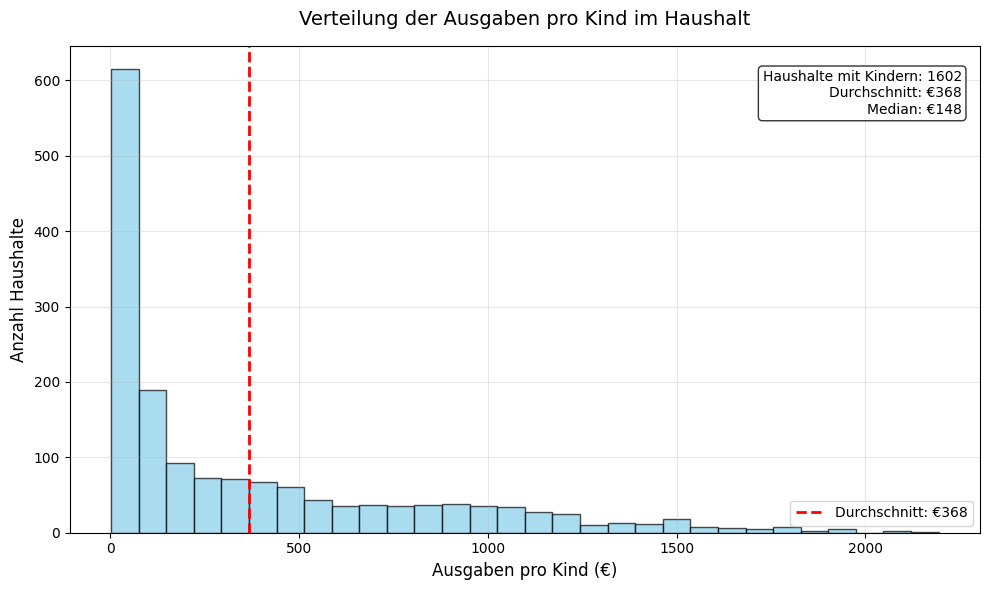

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Berechnung (falls noch nicht gemacht)
df['Kinder_insgesamt'] = df['Kinder_zu_Hause'] + df['Teenager_zu_Hause']
haushalte_mit_kindern = df[df['Kinder_insgesamt'] > 0].copy()
haushalte_mit_kindern['Ausgaben_pro_Kind'] = haushalte_mit_kindern['Gesamtausgaben'] / haushalte_mit_kindern['Kinder_insgesamt']

# Histogramm
plt.figure(figsize=(10, 6))

# Daten
ausgaben_pro_kind = haushalte_mit_kindern['Ausgaben_pro_Kind'].dropna()

# Histogramm
n, bins, patches = plt.hist(ausgaben_pro_kind, bins=30, edgecolor='black', alpha=0.7, color='skyblue')

# Mittellinie (Durchschnitt)
durchschnitt = ausgaben_pro_kind.mean()
plt.axvline(durchschnitt, color='red', linestyle='--', linewidth=2, label=f'Durchschnitt: €{durchschnitt:.0f}')

# Beschriftungen
plt.xlabel('Ausgaben pro Kind (€)', fontsize=12)
plt.ylabel('Anzahl Haushalte', fontsize=12)
plt.title('Verteilung der Ausgaben pro Kind im Haushalt', fontsize=14, pad=15)
plt.legend()
plt.grid(alpha=0.3)

# Statistik im Plot
plt.text(0.98, 0.95, f'Haushalte mit Kindern: {len(haushalte_mit_kindern)}\n'
                      f'Durchschnitt: €{durchschnitt:.0f}\n'
                      f'Median: €{ausgaben_pro_kind.median():.0f}',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('ausgaben_pro_kind_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\faraz\AppData\Local\Temp\ipykernel_2984\2150695555.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(boxplot_data, labels=labels, patch_artist=True)


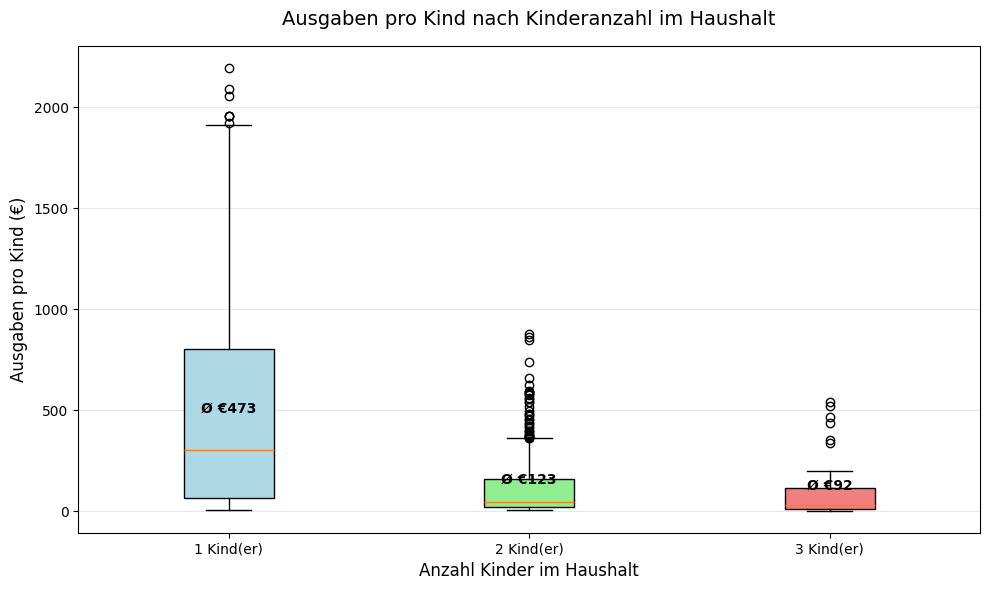

In [ ]:
# Boxplot nach Kinderanzahl
plt.figure(figsize=(10, 6))

# Daten vorbereiten
boxplot_data = []
labels = []
for kinderanzahl in sorted(haushalte_mit_kindern['Kinder_insgesamt'].unique()):
    if kinderanzahl <= 4:  # Begrenzen für bessere Übersicht
        daten = haushalte_mit_kindern[haushalte_mit_kindern['Kinder_insgesamt'] == kinderanzahl]['Ausgaben_pro_Kind']
        boxplot_data.append(daten)
        labels.append(f'{kinderanzahl} Kind(er)')

# Boxplot
box = plt.boxplot(boxplot_data, labels=labels, patch_artist=True)

# Farben
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Beschriftungen
plt.xlabel('Anzahl Kinder im Haushalt', fontsize=12)
plt.ylabel('Ausgaben pro Kind (€)', fontsize=12)
plt.title('Ausgaben pro Kind nach Kinderanzahl im Haushalt', fontsize=14, pad=15)
plt.grid(axis='y', alpha=0.3)

# Durchschnittswerte hinzufügen
for i, daten in enumerate(boxplot_data):
    plt.text(i+1, daten.mean(), f'Ø €{daten.mean():.0f}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('ausgaben_pro_kind_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print("="*70)
print("🏆 VERGLEICH DER 4 IDEEN")
print("="*70)

ideen_bewertung = {
    "Kunden-Lebenszeitwert": {
        "Vorteil": "Zeigt wer langfristig Geld bringt",
        "Business-Impact": "HOCH (Fokus auf profitable Kunden)",
        "Einfachheit": "Mittel",
        "Anders": "⭐⭐⭐⭐ (kaum einer macht das)"
    },
    "Risiko-Kunden": {
        "Vorteil": "Verhindert Kundenverlust",
        "Business-Impact": "HOCH (Kunden halten ist billiger als Neukunden)",
        "Einfachheit": "Einfach",
        "Anders": "⭐⭐⭐ (etwas machen Churn-Analyse)"
    },
    "Rabatt-Optimierung": {
        "Vorteil": "Spart Geld bei Rabatten",
        "Business-Impact": "Mittel (direkte Einsparungen)",
        "Einfachheit": "Einfach",
        "Anders": "⭐⭐ (manche analysieren Rabatte)"
    },
    "Next-Best-Product": {
        "Vorteil": "Persönliche Angebote → mehr Umsatz",
        "Business-Impact": "SEHR HOCH (Cross-Selling)",
        "Einfachheit": "Einfach (visuell gut darstellbar)",
        "Anders": "⭐⭐⭐⭐⭐ (fast niemand macht das!)"
    }
}

for idee, bewertung in ideen_bewertung.items():
    print(f"\n{idee.upper()}:")
    for kriterium, wert in bewertung.items():
        print(f"  {kriterium}: {wert}")

🏆 VERGLEICH DER 4 IDEEN

KUNDEN-LEBENSZEITWERT:
  Vorteil: Zeigt wer langfristig Geld bringt
  Business-Impact: HOCH (Fokus auf profitable Kunden)
  Einfachheit: Mittel
  Anders: ⭐⭐⭐⭐ (kaum einer macht das)

RISIKO-KUNDEN:
  Vorteil: Verhindert Kundenverlust
  Business-Impact: HOCH (Kunden halten ist billiger als Neukunden)
  Einfachheit: Einfach
  Anders: ⭐⭐⭐ (etwas machen Churn-Analyse)

RABATT-OPTIMIERUNG:
  Vorteil: Spart Geld bei Rabatten
  Business-Impact: Mittel (direkte Einsparungen)
  Einfachheit: Einfach
  Anders: ⭐⭐ (manche analysieren Rabatte)

NEXT-BEST-PRODUCT:
  Vorteil: Persönliche Angebote → mehr Umsatz
  Business-Impact: SEHR HOCH (Cross-Selling)
  Einfachheit: Einfach (visuell gut darstellbar)
  Anders: ⭐⭐⭐⭐⭐ (fast niemand macht das!)


In [ ]:
print("\n" + "="*60)
print("VORSCHLAG 3: AUSGABEN PRO KIND IM HAUSHALT")
print("="*60)

# 1. Gesamtausgaben neu berechnen (falls Spalte fehlt)
ausgaben_spalten = ['Ausgaben_Wein', 'Ausgaben_Obst', 'Ausgaben_Fleisch', 
                    'Ausgaben_Fisch', 'Ausgaben_Süßigkeiten', 'Ausgaben_Gold']

# Prüfen ob Spalten existieren
fehlende_spalten = [col for col in ausgaben_spalten if col not in df.columns]
if fehlende_spalten:
    print(f"⚠️ Fehlende Spalten: {fehlende_spalten}")
    print("Berechne mit verfügbaren Spalten...")
    verfügbare_spalten = [col for col in ausgaben_spalten if col in df.columns]
    df['Gesamtausgaben_temp'] = df[verfügbare_spalten].sum(axis=1)
    gesamtausgaben_col = 'Gesamtausgaben_temp'
else:
    df['Gesamtausgaben_temp'] = df[ausgaben_spalten].sum(axis=1)
    gesamtausgaben_col = 'Gesamtausgaben_temp'

# 2. Berechnung
df['Kinder_insgesamt'] = df['Kinder_zu_Hause'] + df['Teenager_zu_Hause']
haushalte_mit_kindern = df[df['Kinder_insgesamt'] > 0].copy()
haushalte_mit_kindern['Ausgaben_pro_Kind'] = haushalte_mit_kindern[gesamtausgaben_col] / haushalte_mit_kindern['Kinder_insgesamt']

# 3. Ergebnisse
print(f"Haushalte mit Kindern: {len(haushalte_mit_kindern)}")
print(f"Durchschn. Ausgaben pro Kind: €{haushalte_mit_kindern['Ausgaben_pro_Kind'].mean():.0f}")

# 4. Optional: Korrelation mit Einkommen (wenn Einkommen existiert)
if 'Einkommen' in df.columns:
    corr = haushalte_mit_kindern['Ausgaben_pro_Kind'].corr(haushalte_mit_kindern['Einkommen'])
    print(f"Korrelation mit Einkommen: {corr:.3f}")

print("="*60)


VORSCHLAG 3: AUSGABEN PRO KIND IM HAUSHALT
Haushalte mit Kindern: 1602
Durchschn. Ausgaben pro Kind: €368
Korrelation mit Einkommen: 0.514


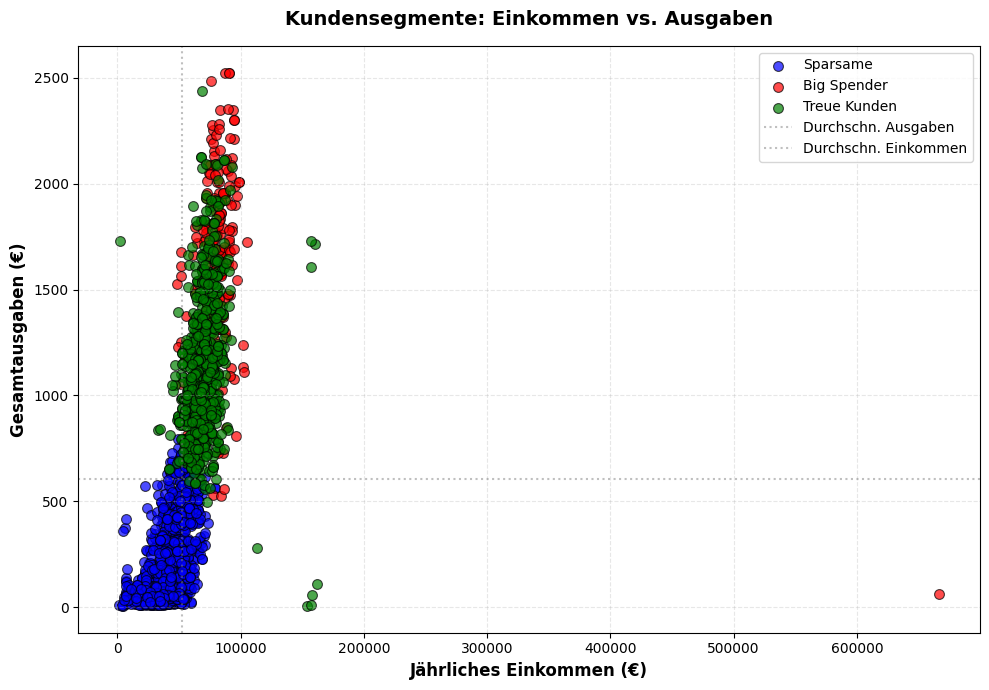

✅ Gespeichert: 'cluster_einkommen_ausgaben.png'


In [ ]:
# Visualisierung 1: Einkommen vs. Gesamtausgaben
plt.figure(figsize=(10, 7))

colors = ['blue', 'red', 'green']
cluster_names = ['Sparsame', 'Big Spender', 'Treue Kunden']

for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Einkommen'], 
                cluster_data['Gesamtausgaben'],
                c=colors[cluster],
                label=cluster_names[cluster],
                alpha=0.7,
                s=50,
                edgecolors='black',
                linewidth=0.8)

plt.xlabel('Jährliches Einkommen (€)', fontsize=12, fontweight='bold')
plt.ylabel('Gesamtausgaben (€)', fontsize=12, fontweight='bold')
plt.title('Kundensegmente: Einkommen vs. Ausgaben', fontsize=14, fontweight='bold', pad=15)
plt.legend(title='Kundensegment', title_fontsize=12, fontsize=11)
plt.grid(alpha=0.3, linestyle='--')

# Durchschnittswerte als Referenzlinien
plt.axhline(y=df['Gesamtausgaben'].mean(), color='gray', linestyle=':', alpha=0.5, label='Durchschn. Ausgaben')
plt.axvline(x=df['Einkommen'].mean(), color='gray', linestyle=':', alpha=0.5, label='Durchschn. Einkommen')

plt.legend()
plt.tight_layout()
plt.savefig('cluster_einkommen_ausgaben.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Gespeichert: 'cluster_einkommen_ausgaben.png'")

C:\Users\faraz\AppData\Local\Temp\ipykernel_2984\2351044652.py:86: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\faraz\AppData\Local\Temp\ipykernel_2984\2351044652.py:89: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.savefig('cluster_3d_professional.png',
C:\Users\faraz\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


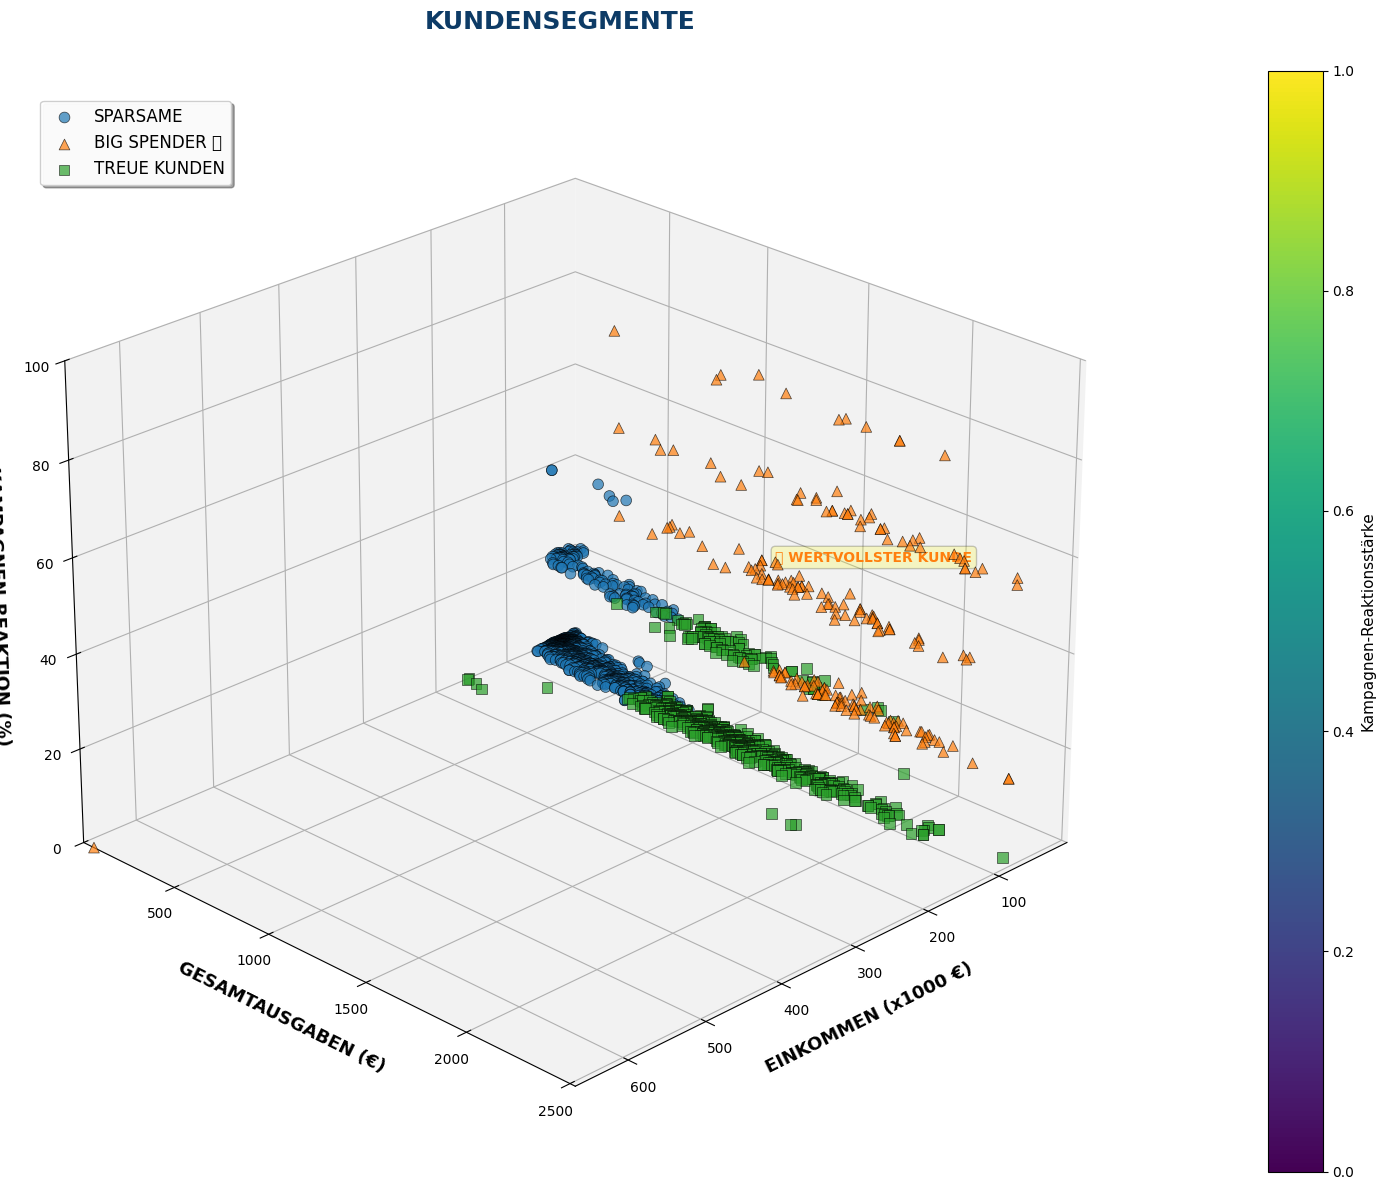

✅ PROFESSIONELLE 3D-VISUALISIERUNG GESPEICHERT!
📁 Datei: 'cluster_3d_professional.png'
📏 Größe: 16x12 Zoll, 300 DPI (präsentationsbereit)
🎨 Farben: Professionelle Palette
⭐ Highlight: Big Spender markiert


In [ ]:
# ============================================
# 3D KUNDENSEGMENT-VISUALISIERUNG
# ============================================

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Erstelle 3D Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Farben und Labels
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blau, Orange, Grün
cluster_names = ['SPARSAME', 'BIG SPENDER ⭐', 'TREUE KUNDEN']
markers = ['o', '^', 's']  # Kreis, Dreieck, Quadrat

# Für jeden Cluster
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    
    # 3D Scatter Plot
    scatter = ax.scatter(
        cluster_data['Einkommen'] / 1000,           # X: Einkommen (Tausend €)
        cluster_data['Gesamtausgaben'],            # Y: Gesamtausgaben
        cluster_data['Kampagnen_Reaktionsrate'] * 100,  # Z: Kampagnenreaktion (%)
        c=colors[cluster],
        label=cluster_names[cluster],
        alpha=0.7,
        s=60,
        edgecolors='black',
        linewidth=0.5,
        marker=markers[cluster],
        depthshade=True
    )

# ============ PROFESSIONELLE BESCHRIFTUNG ============
ax.set_xlabel('\nEINKOMMEN (x1000 €)', fontsize=13, fontweight='bold', linespacing=2)
ax.set_ylabel('\nGESAMTAUSGABEN (€)', fontsize=13, fontweight='bold', linespacing=2)
ax.set_zlabel('\nKAMPAGNEN-REAKTION (%)', fontsize=13, fontweight='bold', linespacing=2)

# Titel
ax.set_title('KUNDENSEGMENTE', 
             fontsize=18, fontweight='bold', pad=30, color='#0d3b66')

# Legende
legend = ax.legend(fontsize=12, loc='upper left', 
                   bbox_to_anchor=(0.02, 0.98),
                   framealpha=0.95, shadow=True)

# Gitter
ax.grid(True, alpha=0.2, linestyle='--')

# Achsen-Limits für besseren Blick
ax.set_xlim(df['Einkommen'].min()/1000, df['Einkommen'].max()/1000)
ax.set_ylim(df['Gesamtausgaben'].min(), df['Gesamtausgaben'].max())
ax.set_zlim(0, 100)

# Blickwinkel (optimiert für beste Sicht)
ax.view_init(elev=25, azim=45)  # 25° Höhe, 45° Drehung

# Hintergrundfarbe
ax.xaxis.set_pane_color((0.95, 0.95, 0.95, 0.95))
ax.yaxis.set_pane_color((0.95, 0.95, 0.95, 0.95))
ax.zaxis.set_pane_color((0.95, 0.95, 0.95, 0.95))

# ============ ANNOTATIONEN FÜR WICHTIGE PUNKTE ============
# Beispiel: Highlight Big Spender
if 'Einkommen' in df.columns and 'Gesamtausgaben' in df.columns:
    # Finde einen typischen Big Spender
    big_spender = df[df['Cluster'] == 1].iloc[0]
    ax.text(big_spender['Einkommen']/1000 + 5,
            big_spender['Gesamtausgaben'] + 50,
            big_spender['Kampagnen_Reaktionsrate']*100 + 5,
            '⭐ WERTVOLLSTER KUNDE',
            fontsize=10, fontweight='bold',
            color='#ff7f0e',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.2))

# ============ FARBLEISTE FÜR KAMPAGNENREAKTION ============
# (Optional) Fügt eine Farbleiste für die Z-Achse hinzu
scatter_plot = ax.scatter([], [], [], c=[], cmap='viridis')  # Dummy für Colorbar
cbar = fig.colorbar(scatter_plot, ax=ax, pad=0.1)
cbar.set_label('Kampagnen-Reaktionsstärke', fontsize=11)

plt.tight_layout()

# Speichern
plt.savefig('cluster_3d_professional.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none')

plt.show()

print("="*60)
print("✅ PROFESSIONELLE 3D-VISUALISIERUNG GESPEICHERT!")
print("="*60)
print("📁 Datei: 'cluster_3d_professional.png'")
print("📏 Größe: 16x12 Zoll, 300 DPI (präsentationsbereit)")
print("🎨 Farben: Professionelle Palette")
print("⭐ Highlight: Big Spender markiert")
print("="*60)

C:\Users\faraz\AppData\Local\Temp\ipykernel_2984\1365498495.py:21: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\faraz\AppData\Local\Temp\ipykernel_2984\1365498495.py:22: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.savefig('cluster_marketing_loyalitaet.png', dpi=300, bbox_inches='tight')


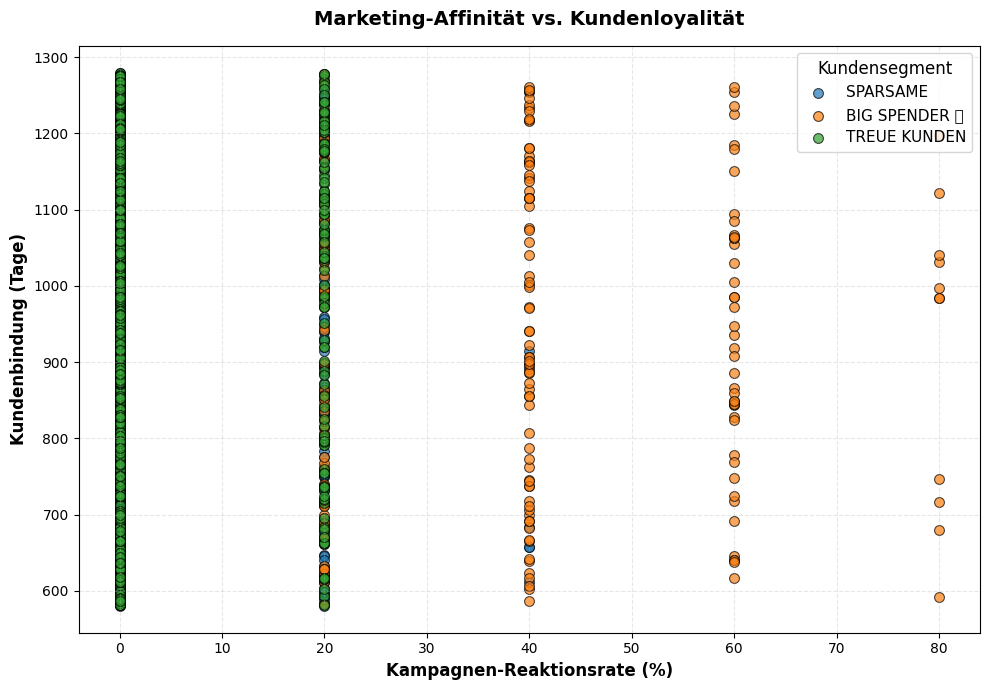

✅ Gespeichert: 'cluster_marketing_loyalitaet.png'


In [ ]:
# Visualisierung 2: Kampagnenreaktion vs. Kundenbindung
plt.figure(figsize=(10, 7))

for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Kampagnen_Reaktionsrate'] * 100,
                cluster_data['Kunden_dauer_Tage'],
                c=colors[cluster],
                label=cluster_names[cluster],
                alpha=0.7,
                s=50,
                edgecolors='black',
                linewidth=0.8)

plt.xlabel('Kampagnen-Reaktionsrate (%)', fontsize=12, fontweight='bold')
plt.ylabel('Kundenbindung (Tage)', fontsize=12, fontweight='bold')
plt.title('Marketing-Affinität vs. Kundenloyalität', fontsize=14, fontweight='bold', pad=15)
plt.legend(title='Kundensegment', title_fontsize=12, fontsize=11)
plt.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('cluster_marketing_loyalitaet.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Gespeichert: 'cluster_marketing_loyalitaet.png'")

C:\Users\faraz\AppData\Local\Temp\ipykernel_2984\1587743110.py:21: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\faraz\AppData\Local\Temp\ipykernel_2984\1587743110.py:22: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.savefig('cluster_haushalt_ausgaben.png', dpi=300, bbox_inches='tight')


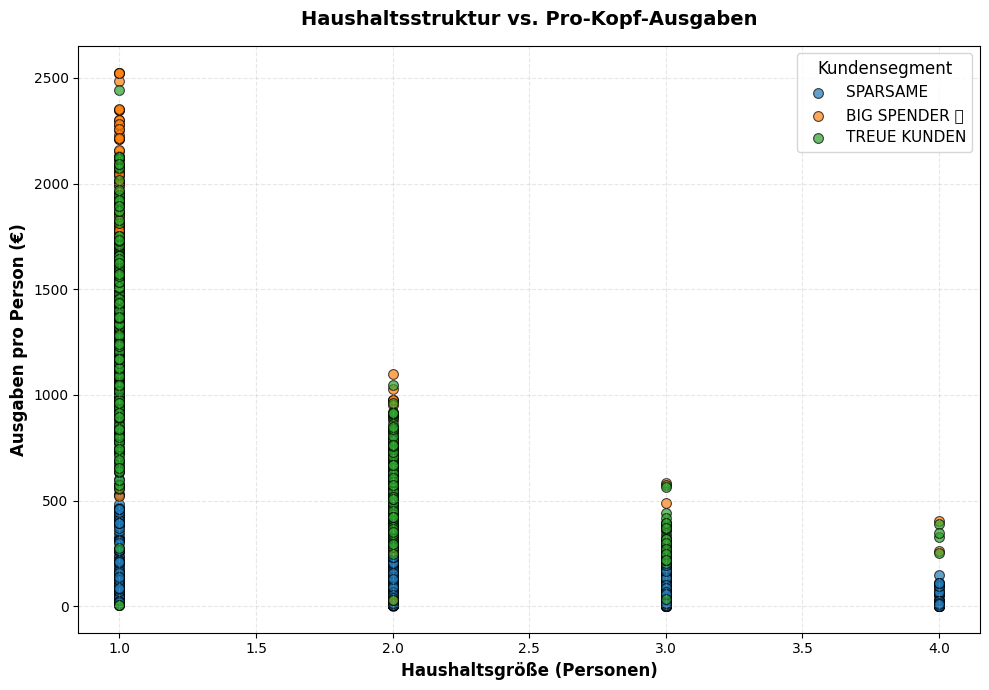

✅ Gespeichert: 'cluster_haushalt_ausgaben.png'


In [ ]:
# Visualisierung 3: Haushalt vs. Pro-Kopf-Ausgaben
plt.figure(figsize=(10, 7))

for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Haushaltsgroesse'],
                cluster_data['Ausgaben_pro_Person'],
                c=colors[cluster],
                label=cluster_names[cluster],
                alpha=0.7,
                s=50,
                edgecolors='black',
                linewidth=0.8)

plt.xlabel('Haushaltsgröße (Personen)', fontsize=12, fontweight='bold')
plt.ylabel('Ausgaben pro Person (€)', fontsize=12, fontweight='bold')
plt.title('Haushaltsstruktur vs. Pro-Kopf-Ausgaben', fontsize=14, fontweight='bold', pad=15)
plt.legend(title='Kundensegment', title_fontsize=12, fontsize=11)
plt.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('cluster_haushalt_ausgaben.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Gespeichert: 'cluster_haushalt_ausgaben.png'")

C:\Users\faraz\AppData\Local\Temp\ipykernel_2984\3273331588.py:26: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\faraz\AppData\Local\Temp\ipykernel_2984\3273331588.py:27: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.savefig('cluster_kaufaktivitaet.png', dpi=300, bbox_inches='tight')
C:\Users\faraz\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


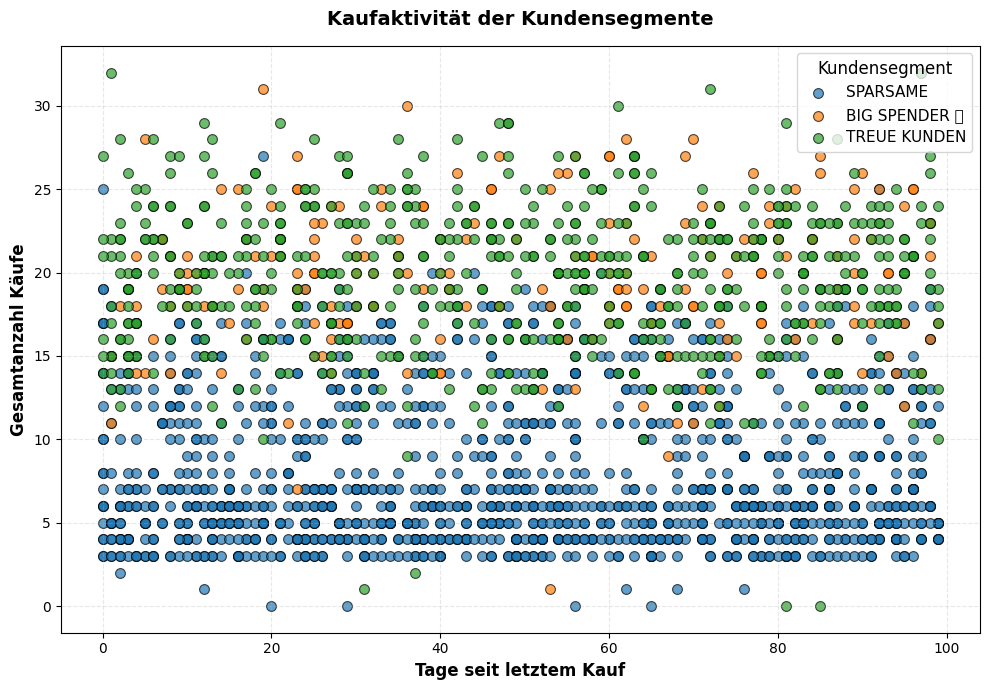

✅ Gespeichert: 'cluster_kaufaktivitaet.png'


In [ ]:
# Visualisierung 4: Kaufaktivität
plt.figure(figsize=(10, 7))

for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    # Gesamtkäufe berechnen
    gesamt_kaeufe = (cluster_data['Anzahl_Webkäufe'] + 
                     cluster_data['Anzahl_Ladeneinkäufe'] + 
                     cluster_data['Anzahl_Katalogkäufe'])
    
    plt.scatter(cluster_data['Letzter_Kauf_Tage'],
                gesamt_kaeufe,
                c=colors[cluster],
                label=cluster_names[cluster],
                alpha=0.7,
                s=50,
                edgecolors='black',
                linewidth=0.8)

plt.xlabel('Tage seit letztem Kauf', fontsize=12, fontweight='bold')
plt.ylabel('Gesamtanzahl Käufe', fontsize=12, fontweight='bold')
plt.title('Kaufaktivität der Kundensegmente', fontsize=14, fontweight='bold', pad=15)
plt.legend(title='Kundensegment', title_fontsize=12, fontsize=11)
plt.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('cluster_kaufaktivitaet.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Gespeichert: 'cluster_kaufaktivitaet.png'")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Verschiedene Regularisierungs-Stärken testen
regularization_strengths = [0.001, 0.01, 0.1, 1, 10, 100]

print("Regularisierungstest für Logistische Regression:")
print("="*50)

for C_value in regularization_strengths:
    # C = 1/λ (kleiner C = stärkere Regularisierung)
    model = LogisticRegression(C=C_value, class_weight='balanced', random_state=42, max_iter=1000)
    
    # Cross-Validation Score
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    print(f"C = {C_value:6} → Durchschnittliche Accuracy: {scores.mean():.3f} (±{scores.std():.3f})")

Regularisierungstest für Logistische Regression:
C =  0.001 → Durchschnittliche Accuracy: 0.823 (±0.019)
C =   0.01 → Durchschnittliche Accuracy: 0.838 (±0.025)
C =    0.1 → Durchschnittliche Accuracy: 0.842 (±0.019)
C =      1 → Durchschnittliche Accuracy: 0.836 (±0.019)
C =     10 → Durchschnittliche Accuracy: 0.836 (±0.019)
C =    100 → Durchschnittliche Accuracy: 0.836 (±0.019)


In [ ]:
# Einfacher Check: Welche Grafiken hast du?
import glob

print("📊 DEINE GRAFIKEN-ÜBERSICHT:")
print("="*40)

png_liste = glob.glob('*.png')
print(f"Anzahl Grafiken: {len(png_liste)}")

if len(png_liste) > 0:
    print("\n📁 Liste meine Grafiken:")
    for grafik in sorted(png_liste):
        print(f"• {grafik}")
else:
    print("❌ Keine PNG-Grafiken gefunden!")
    
print("\n" + "="*40)
print("🎯 Nächster Schritt: Diese Grafiken für PowerPoint vorbereiten.")

📊 DEINE GRAFIKEN-ÜBERSICHT:
Anzahl Grafiken: 18

📁 Liste meine Grafiken:
• ausgaben_analyse.png
• ausgaben_pro_kind_boxplot.png
• ausgaben_pro_kind_histogram.png
• cluster_3d_professional.png
• cluster_einkommen_ausgaben.png
• cluster_haushalt_ausgaben.png
• cluster_kaufaktivitaet.png
• cluster_marketing_loyalitaet.png
• cluster_profile_gut.png
• cluster_verteilung.png
• cluster_visualisierung_2d.png
• confusion_einfach.png
• confusion_gut.png
• confusion_matrix.png
• confusion_matrix_blau.png
• feature_importance_final.png
• korrelationsmatrix.png
• next_best_product.png

🎯 Nächster Schritt: Diese Grafiken für PowerPoint vorbereiten.
